In [1]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

# Polynomial Regression

### Helper Functions

In [2]:
def get_R2_features(model, X, X_test, X_train, y_test, y_train, test=True): 

    features=list(X)
    #features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [3]:
def  plot_kde(y,yhat):
    
    plt.figure()
    ax1 = sns.kdeplot(y, color="r", label="Actual Value")
    sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

## Reading the data and checking basic properties

The data is from a dataset with car information. The set has already been cleaned end one-hot encoded.

There are 205 entries, over 36 columns, all of them float values.

In [4]:
data = pd.read_csv('./data/encoded_car_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

Let's first inspect some preliminary fits using `sns.lmplot`, which plots regression fits of a chosen order over the data.

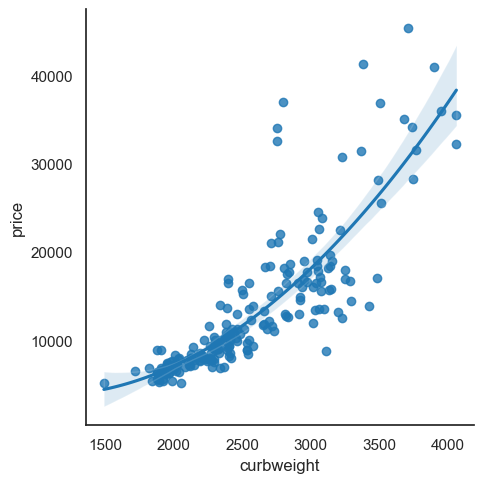

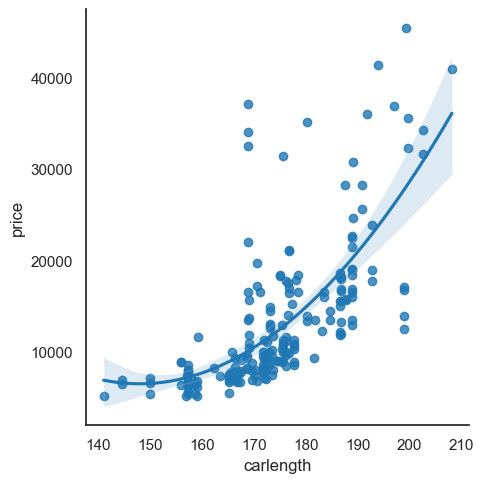

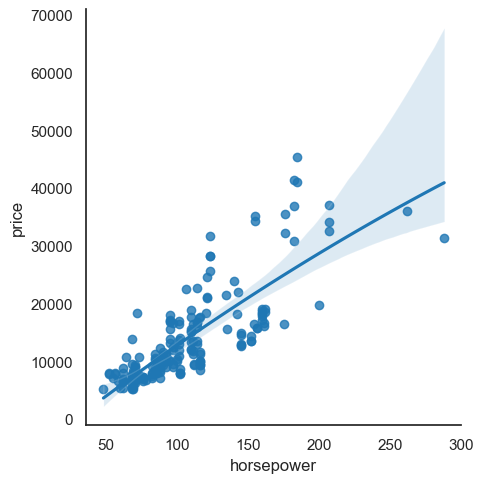

In [5]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2);
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2);
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2);

So from this we can already see that the relastionship is not linear for at elast some of the variables.

## Preparing the data for modeling

### Splitting

Now we can split the data. First into features and target variable. Then in train/test splits.

In [6]:
X = data.drop('price', axis=1)
y = data.price

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 62
Number of training samples: 143


Let's start with a basic regression model to see how it performs.

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
print(f"R^2 score on training data {lr.score(X_train, y_train):.4f}")
print(f"R^2 score on testing data {lr.score(X_test, y_test):.4f}")

R^2 score on training data 0.9263
R^2 score on testing data 0.8471


That is actually quite a high $R^2$ score. Let's also visualise the distribution of predicted and actual values

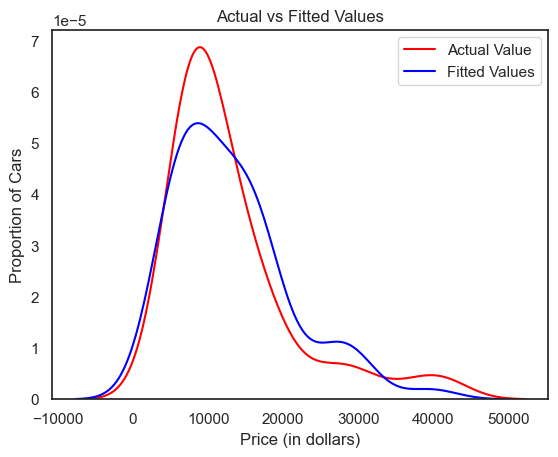

In [9]:
plot_kde(y_test,predicted)

And let's check the coefficients of each of the feature variables. We can visualise this using a bar plot. In  this case we take the absolute value, which means we can easily see which features have more impact (the plot does not show if this is a negative or positive effect).

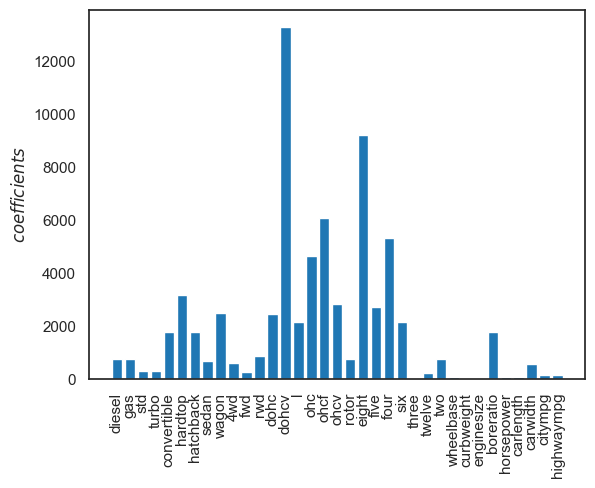

In [10]:
plt.bar(X.columns,abs(lr.coef_))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

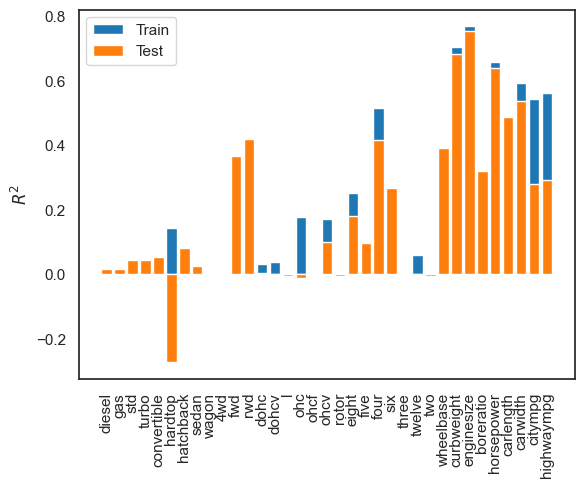

Training R^2 mean value 0.21194408471824258 Testing R^2 mean value 0.17712476737177602 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [11]:
get_R2_features(lr, X, X_test, X_train, y_test, y_train)

Let's now build a regression pipeline which includes a data scaling statge. Then calculate the $R^2$ value end plot the results.

R^2 (train) = 0.9262722224294516, R^2 (test) = 0.8419174509630335


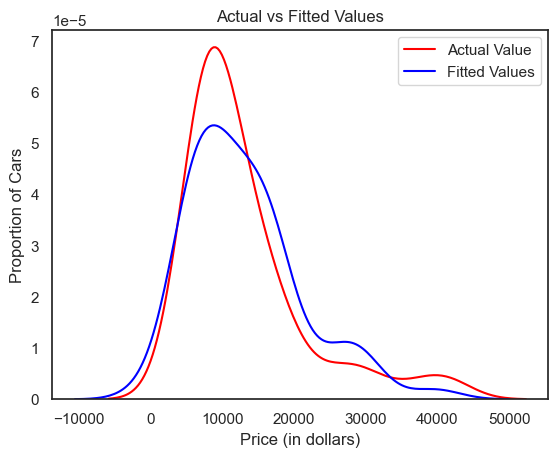

In [12]:
steps = [('scale', StandardScaler()), ('regress', LinearRegression())]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
print(f"R^2 (train) = {pipe.score(X_train, y_train)}, R^2 (test) = {pipe.score(X_test, y_test)}")
y_pred = pipe.predict(X_test)
plot_kde(y_test, y_pred)

So we can get a decent fit with $R^2\approx 0.9$ on the training and $R^2\approx 0.85$ on the test data.

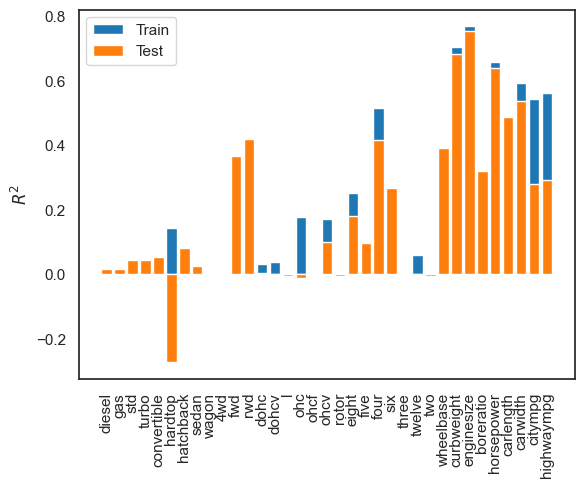

Training R^2 mean value 0.2119440847182426 Testing R^2 mean value 0.17712476737177596 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [13]:
pipe = Pipeline([('scale',StandardScaler() ),('regress', LinearRegression())])
get_R2_features(pipe, X, X_test, X_train, y_test, y_train)

## Automating the fit process using GridSearch CV

To improve model performance we can add additional features based on the base features. Some examples include Polynomial Features, ratio features or other scaled combinations.

Adding these features is dependent on several `hyperparameters`, these are settings that are not actual model parameters used for fitting, but are used for configuring the model. This can include, polynomial feature degree, train/test split sizes, KFold size and many more. 

It can be quite hard to see in advance what would work and can cost significant effort to identify these settings manually. For this we can use a grid based approach to find optimal configurations with sklearn's GridSearchCV. This function checks each configuration, performs cross validation and finally shows which combination of parameters works best.

Especially in combination with the Pipeline, this can significantly improve our workflow.

As an example, below we use GridSearchCV to find the best degree of polynomial features to add to this model.

In [14]:
pipe_steps = [
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('scale', StandardScaler()),
    ('model', LinearRegression()),
]
pipe = Pipeline(pipe_steps)

# The format here is <step_name>__<input_parameter> for each of the grid choices
parameter_grid = {
    'poly__degree': [1, 2, 3]
}

grid_search = GridSearchCV(pipe, parameter_grid, n_jobs=1)
grid_search.fit(X_train, y_train)
pipe = grid_search.best_estimator_
pipe.score(X_test, y_test)

0.8419174509630336

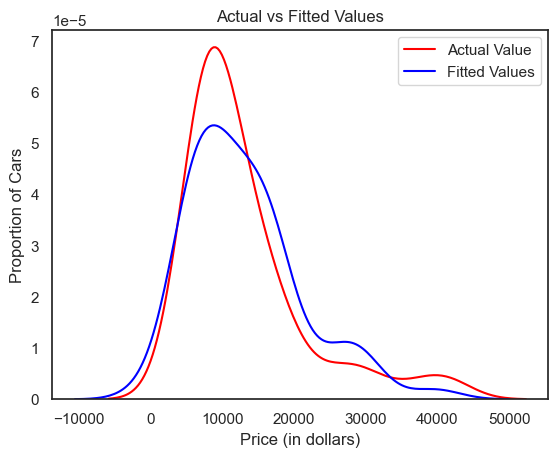

In [15]:
y_pred = pipe.predict(X_test)
plot_kde(y_test,y_pred)